In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
import sklearn.metrics as metrics

In [2]:
Categories=["angry","fear","happy","sad","surprise"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir=r"C:\Users\liyu\Desktop\MS Class\ML\mlproject\images\train" 

#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(48,48,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : angry
loaded category:angry successfully
loading... category : fear
loaded category:fear successfully
loading... category : happy
loaded category:happy successfully
loading... category : sad
loaded category:sad successfully
loading... category : surprise
loaded category:surprise successfully


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,Target
0,0.568627,0.568627,0.568627,0.580392,0.580392,0.580392,0.576471,0.576471,0.576471,0.576471,...,0.047059,0.047059,0.047059,0.058824,0.058824,0.058824,0.054902,0.054902,0.054902,0
1,0.733333,0.733333,0.733333,0.741176,0.741176,0.741176,0.780392,0.780392,0.780392,0.749020,...,0.878431,0.878431,0.878431,0.866667,0.866667,0.866667,0.862745,0.862745,0.862745,0
2,0.262745,0.262745,0.262745,0.254902,0.254902,0.254902,0.231373,0.231373,0.231373,0.235294,...,0.541176,0.541176,0.541176,0.533333,0.533333,0.533333,0.533333,0.533333,0.533333,0
3,0.294118,0.294118,0.294118,0.278431,0.278431,0.278431,0.207843,0.207843,0.207843,0.274510,...,0.090196,0.090196,0.090196,0.121569,0.121569,0.121569,0.129412,0.129412,0.129412,0
4,0.427451,0.427451,0.427451,0.450980,0.450980,0.450980,0.431373,0.431373,0.431373,0.349020,...,0.337255,0.337255,0.337255,0.337255,0.337255,0.337255,0.345098,0.345098,0.345098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.141176,0.141176,0.141176,0.101961,0.101961,0.101961,0.168627,0.168627,0.168627,0.262745,...,0.513725,0.513725,0.513725,0.517647,0.517647,0.517647,0.533333,0.533333,0.533333,4
246,0.027451,0.027451,0.027451,0.019608,0.019608,0.019608,0.015686,0.015686,0.015686,0.015686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
247,0.764706,0.764706,0.764706,0.764706,0.764706,0.764706,0.772549,0.772549,0.772549,0.780392,...,0.047059,0.047059,0.047059,0.023529,0.023529,0.023529,0.078431,0.078431,0.078431,4
248,0.172549,0.172549,0.172549,0.172549,0.172549,0.172549,0.200000,0.200000,0.200000,0.290196,...,0.078431,0.078431,0.078431,0.062745,0.062745,0.062745,0.094118,0.094118,0.094118,4


In [4]:
x.shape,y.shape

((250, 6912), (250,))

In [5]:
# scaler=StandardScaler().fit(x_train)
# scaler

# SVM MODEL BUILDING

In [6]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')


Splitted Successfully


In [8]:
x_train.shape,y_test.shape

((200, 6912), (50,))

In [9]:
model.fit(x_train,y_train)
print('The Model is trained well with the given images')# model.best_params_ contains the best parameters obtained from GridSearchCV

The Model is trained well with the given images


Enter URL of Image :C:\Users\liyu\Desktop\MS Class\ML\mlproject\images\train\fear\26876.jpg


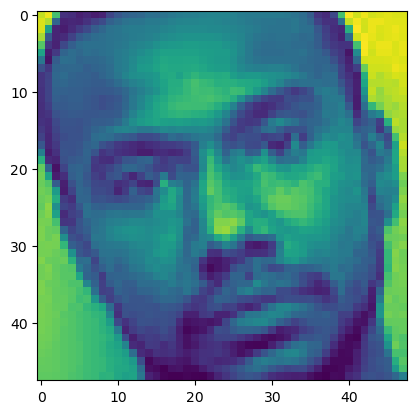

angry = 19.91363239138613%
fear = 22.288355636903372%
happy = 19.26179055503813%
sad = 18.71556223035126%
surprise = 19.82065918632111%
The predicted image is : fear


In [72]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(48,48,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [10]:
from sklearn.metrics import accuracy_score
svm_pred=model.predict(x_test)
print("The predicted Data is :")
print(svm_pred)
print("The actual data is:")
print(np.array(y_test))
svm_accuracy=accuracy_score(svm_pred,y_test)*100
print(f"The model is compute {svm_accuracy}% accurate")

The predicted Data is :
[1 4 4 4 3 2 4 0 1 4 1 1 3 0 0 4 2 4 2 3 1 3 3 2 1 0 4 3 2 2 4 0 0 4 0 1 1
 4 0 2 1 2 0 3 3 1 0 3 0 2]
The actual data is:
[0 4 0 2 3 4 3 0 1 4 4 0 3 0 2 3 0 1 2 3 1 3 3 4 1 3 2 2 2 2 4 1 1 4 0 1 4
 4 0 2 1 2 1 0 3 0 1 3 4 2]
The model is compute 54.0% accurate


In [11]:
y_pred_proba = model.predict_proba(x_test)
svmm_auc = metrics.roc_auc_score(y_test,y_pred_proba, multi_class='ovr')*100
print("AUC  = ",svmm_auc)


# precision score
svm_precision = precision_score(svm_pred,y_test, average='macro')*100
print("precision score : "+str(svm_precision))

#recall score
svm_recall = recall_score(svm_pred,y_test, average='macro')*100
print("recall score    : "+ str(svm_recall))

#f1 score
svm_f1 = f1_score(svm_pred,y_test, average='macro')*100
print("f1-score       : ", str(svm_f1))


print(classification_report(svm_pred,y_test)+"\n")

AUC  =  67.25000000000001
precision score : 54.0
recall score    : 55.25252525252525
f1-score       :  54.51127819548872
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.50      0.50      0.50        10
           2       0.60      0.67      0.63         9
           3       0.70      0.78      0.74         9
           4       0.50      0.45      0.48        11

    accuracy                           0.54        50
   macro avg       0.54      0.55      0.55        50
weighted avg       0.53      0.54      0.53        50




Text(0.5, 3.722222222222216, 'Predicted Value')

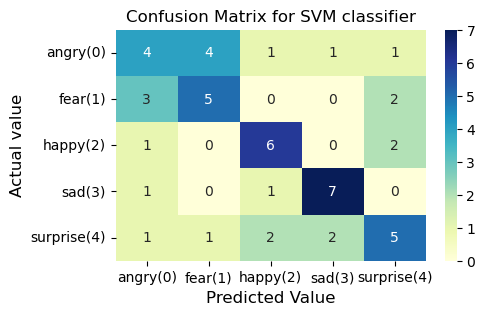

In [12]:
cm_dt = confusion_matrix(svm_pred,y_test)
cm_matrix = pd.DataFrame(data=cm_dt, columns=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'], 
                                 index=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('Confusion Matrix for SVM classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12)

# KNN MODEL BUILDING

In [13]:

knn = KNeighborsClassifier(n_neighbors= 8)

In [14]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [15]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

C:\ProgramData\Anaconda4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [16]:
knn_pred_train = knn.predict(x_train)
knn_accuracy_t=accuracy_score(y_train,knn_pred_train) 
print(knn_accuracy_t)

0.495


C:\ProgramData\Anaconda4\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
knn_accuracy = accuracy_score(y_test,knn_pred)*100
print("Accuracy:",knn_accuracy,"%")

Accuracy: 34.0 %


In [18]:
y_pred_proba = knn.predict_proba(x_test)
knn_auc = metrics.roc_auc_score(y_test,y_pred_proba, multi_class='ovr')*100
print(" AUC  = ",knn_auc)

 AUC  =  61.9


In [19]:
#precision score
knn_precision = precision_score(knn_pred,y_test, average='macro')*100
print(" precision score : " +str(knn_precision))

#recall score
knn_recall = recall_score(knn_pred,y_test, average='macro')*100
print(" recall score : " +str(knn_recall))

#f1 score
knn_f1 = f1_score(knn_pred,y_test, average='macro')*100
print(" f1-score      : " +str(knn_f1))

 precision score : 34.0
 recall score : 34.742063492063494
 f1-score      : 33.379051289268006


In [20]:
print("Accuracy:    ",knn_accuracy)
print()
print(classification_report(y_test,knn_pred)+"\n")

Accuracy:     34.0

              precision    recall  f1-score   support

           0       0.31      0.50      0.38        10
           1       0.33      0.20      0.25        10
           2       0.29      0.20      0.24        10
           3       0.25      0.30      0.27        10
           4       0.56      0.50      0.53        10

    accuracy                           0.34        50
   macro avg       0.35      0.34      0.33        50
weighted avg       0.35      0.34      0.33        50




Text(0.5, 3.722222222222216, 'Predicted Value')

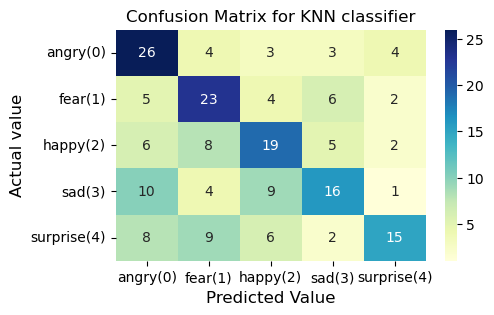

In [21]:
cm_dt = confusion_matrix(y_train,knn_pred_train)
cm_matrix = pd.DataFrame(data=cm_dt, columns=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'], 
                                 index=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='g', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('Confusion Matrix for KNN classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12)

# Random Forest Model Biulding

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = OneVsRestClassifier(RandomForestClassifier(n_estimators=150, criterion = 'entropy', random_state = 42,max_features=2,max_leaf_nodes=100))
rfc.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                     max_features=2,
                                                     max_leaf_nodes=100,
                                                     n_estimators=150,
                                                     random_state=42))

In [24]:
rf_pred_train = rfc.predict(x_train)
rf_accuracy_t=accuracy_score(y_train,rf_pred_train) 
print(rf_accuracy_t)

1.0


In [25]:
pred = rfc.predict(x_test)
rf_accuracy=accuracy_score(pred,y_test)*100
print(rf_accuracy,"%")

44.0 %


In [26]:
import sklearn.metrics as metrics

In [27]:
y_pred_proba = rfc.predict_proba(x_test)
rfc_auc = metrics.roc_auc_score(y_test,y_pred_proba, multi_class='ovr')*100
print(rfc_auc)

66.725


In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix
#precision score
rf_precision = precision_score(pred,y_test, average='macro')*100
print(" precision score : " +str(rf_precision))

#recall score
rf_recall = recall_score(pred,y_test, average='macro')*100
print(" recall score : " +str(rf_recall))

#f1 score
rf_f1 = f1_score(pred,y_test, average='macro')*100
print(" f1-score      : " +str(rf_f1))

 precision score : 44.00000000000001
 recall score : 45.166666666666664
 f1-score      : 44.18181818181818


In [29]:
print("accuracy    = ",rf_accuracy)
print()
print(classification_report(pred,y_test)+"\n")

accuracy    =  44.0

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        10
           1       0.50      0.62      0.56         8
           2       0.40      0.50      0.44         8
           3       0.40      0.33      0.36        12
           4       0.60      0.50      0.55        12

    accuracy                           0.44        50
   macro avg       0.44      0.45      0.44        50
weighted avg       0.44      0.44      0.44        50




# Guassian bayas

In [30]:
from sklearn.naive_bayes import GaussianNB 

In [31]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
nb_pred_train = nb.predict(x_train)
nb_accuracy_t=accuracy_score(y_train,nb_pred_train) 
print(nb_accuracy_t)

0.46


In [33]:
nb_pred = nb.predict(x_test)
nb_accuracy=accuracy_score(nb_pred,y_test)*100
nb_accuracy

28.000000000000004

In [34]:
y_pred_proba = nb.predict_proba(x_test)
nb_auc = metrics.roc_auc_score(y_test,y_pred_proba, multi_class='ovr')*100
print("AUC  = ",nb_auc)

AUC  =  65.77499999999999


In [35]:
# precision score
nb_precision = precision_score(nb_pred,y_test, average='macro')*100
print("precision score : "+str(nb_precision))

#recall score
nb_recall = recall_score(nb_pred,y_test, average='macro')*100
print("recall score    : "+ str(nb_recall))

#f1 score
nb_f1 = f1_score(nb_pred,y_test, average='macro')*100
print("f1-score       : "+ str(nb_f1))

precision score : 27.999999999999996
recall score    : 32.99719887955182
f1-score       : 26.916373386961617


In [36]:
print("accuracy   : ",nb_accuracy)
print(classification_report(nb_pred,y_test)+"\n")

accuracy   :  28.000000000000004
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.30      0.43      0.35         7
           2       0.20      0.67      0.31         3
           3       0.20      0.14      0.17        14
           4       0.70      0.41      0.52        17

    accuracy                           0.28        50
   macro avg       0.28      0.33      0.27        50
weighted avg       0.35      0.28      0.29        50




Text(0.5, 3.722222222222216, 'Predicted Value')

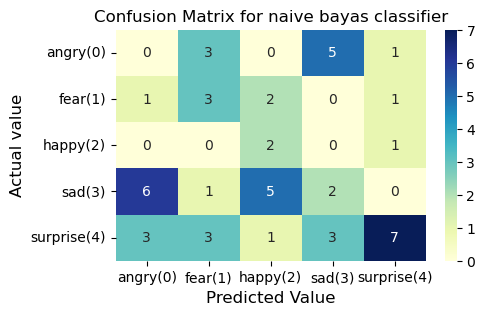

In [37]:
cm_dt = confusion_matrix(nb_pred,y_test)
cm_matrix = pd.DataFrame(data=cm_dt, columns=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'], 
                                 index=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('Confusion Matrix for naive bayas classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12)

In [38]:
# scores = [rf_accuracy,knn_accuracy,svmaccuracy,nb_accuracy_t]
# algorithms = ["RandomForest"," KNN"," SVM", " Naive Bayes  "," "]   

# print("The accuracy score achieved using \n")

# for i in range(len(algorithms)):
#     print(algorithms[i]+" is:    "+str(scores[i])+" %")

# Decision Tree Model Building

In [43]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini',max_features=8,max_depth=14,min_samples_leaf=15)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=14, max_features=8, min_samples_leaf=15)

In [44]:
dt_pred_train = decision_tree.predict(x_train)
dt_accuracy_t=accuracy_score(y_train,dt_pred_train) 
print(dt_accuracy_t)

0.475


In [45]:
dt_pred = decision_tree.predict(x_test)
dt_accuracy=accuracy_score(dt_pred,y_test)*100
dt_accuracy

34.0

In [46]:
y_pred_proba = decision_tree.predict_proba(x_test)
decision_tree_auc = metrics.roc_auc_score(y_test,y_pred_proba, multi_class='ovr')*100
print("AUC  = ",decision_tree_auc)

AUC  =  60.675000000000004


In [47]:
dt_precision = precision_score(dt_pred,y_test, average='macro')*100
print("precision score : "+str(dt_precision))

#recall score
dt_recall = recall_score(dt_pred,y_test, average='macro')*100
print("recall score    : "+ str(dt_recall))

#f1 score
dt_f1 = f1_score(dt_pred,y_test, average='macro')*100
print("f1-score       : "+ str(dt_f1))

precision score : 34.0
recall score    : 34.53571428571428
f1-score       : 33.457013574660635


In [48]:
print("accracy  : ",dt_accuracy)
print(classification_report(dt_pred,y_test)+"\n")

accracy  :  34.0
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.40      0.57      0.47         7
           2       0.50      0.50      0.50        10
           3       0.20      0.20      0.20        10
           4       0.10      0.14      0.12         7

    accuracy                           0.34        50
   macro avg       0.34      0.35      0.33        50
weighted avg       0.37      0.34      0.35        50




In [49]:
import seaborn as sns

Text(0.5, 3.722222222222216, 'Predicted Value')

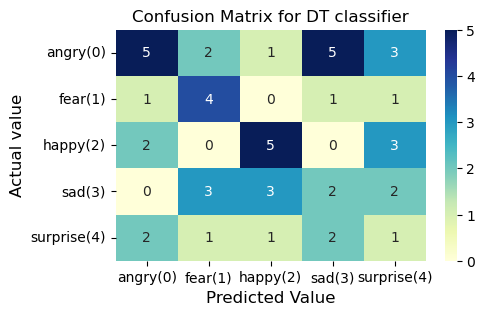

In [50]:
cm_dt = confusion_matrix(dt_pred,y_test)
cm_matrix = pd.DataFrame(data=cm_dt, columns=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'], 
                                 index=['angry(0)','fear(1)','happy(2)', 'sad(3)','surprise(4)'])
fig,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual value' , fontsize = 12)
plt.title('Confusion Matrix for DT classifier',fontsize=12)
plt.xlabel('Predicted Value', fontsize = 12)

# model comparation using diagram
all Performance of AUC, Accuracy, Percision, Recall, and F1 score

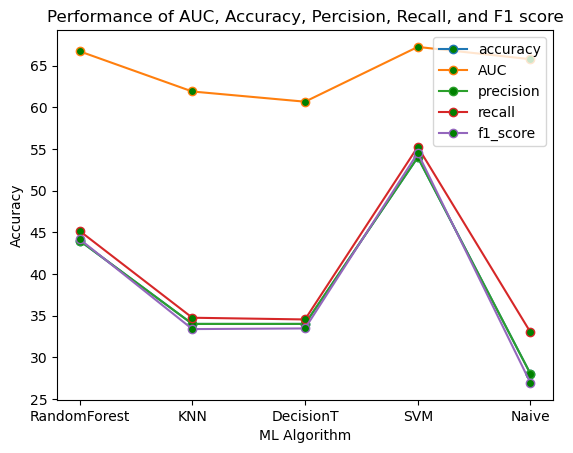

In [51]:
accuracy=[rf_accuracy,knn_accuracy,dt_accuracy,svm_accuracy,nb_accuracy]
auc=[rfc_auc,knn_auc,decision_tree_auc,svmm_auc,nb_auc]
precision=[rf_precision,knn_precision,dt_precision,svm_precision,nb_precision]
recall=[rf_recall,knn_recall,dt_recall,svm_recall,nb_recall]
f1_score=[rf_f1,knn_f1,dt_f1,svm_f1,nb_f1]
algorithmmm = ["RandomForest","KNN","DecisionT", "SVM", "Naive"]   
plt.plot(algorithmmm,accuracy,label='accuracy', marker='o',markerfacecolor='green')
plt.plot(algorithmmm,auc,label='AUC', marker='o',markerfacecolor='green')
plt.plot(algorithmmm,precision,label='precision', marker='o',markerfacecolor='green')
plt.plot(algorithmmm,recall,label='recall', marker='o',markerfacecolor='green')
plt.plot(algorithmmm,f1_score,label='f1_score', marker='o',markerfacecolor='green')
plt.xlabel('ML Algorithm')
plt.ylabel('Accuracy')
plt.title('Performance of AUC, Accuracy, Percision, Recall, and F1 score')
plt.legend()

plt.show()

# Accuracy

In [52]:
scores = [rf_accuracy,knn_accuracy,dt_accuracy,svm_accuracy,nb_accuracy]
algorithms = ["      RandomForest","               KNN","     DecisionTree ", "               SVM", "     Naive Bayes  "]   

print("The accuracy score achieved using \n")

for i in range(len(algorithms)):
    print(algorithms[i]+" is:    "+str(scores[i])+" %")

The accuracy score achieved using 

      RandomForest is:    44.0 %
               KNN is:    34.0 %
     DecisionTree  is:    34.0 %
               SVM is:    54.0 %
     Naive Bayes   is:    28.000000000000004 %


C:\ProgramData\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


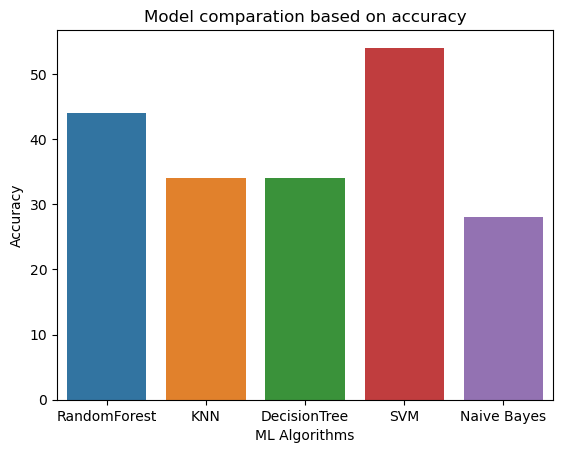

In [53]:
#compare the accuracy of different machine learning algorithms with diagram
algorithms = ["RandomForest","KNN","DecisionTree", "SVM", "Naive Bayes"]   

x=algorithms
y=scores
sns.barplot(x,y)
plt.xlabel('ML Algorithms')
plt.ylabel('Accuracy')
plt.title('Model comparation based on accuracy')
plt.show()

# AUC

In [54]:
#compare the accuracy of different machine learning algorithms with diagram
#knn_accuracy=0.85


scores_auc = [rfc_auc,knn_auc,decision_tree_auc,svmm_auc,nb_auc]
algorithms = ["      RandomForest","               KNN","     DecisionTree ", "               SVM", "     Naive Bayes  "]   

print("The AUC score achieved using \n")

for i in range(len(algorithms)):
    print(algorithms[i]+" is:    "+str(scores_auc[i])+" %")

The AUC score achieved using 

      RandomForest is:    66.725 %
               KNN is:    61.9 %
     DecisionTree  is:    60.675000000000004 %
               SVM is:    67.25000000000001 %
     Naive Bayes   is:    65.77499999999999 %


C:\ProgramData\Anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


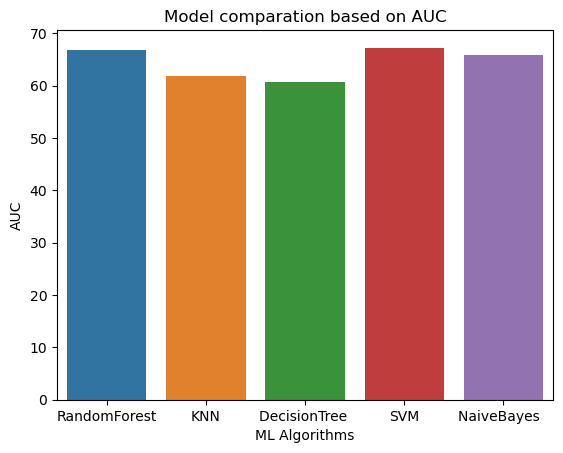

In [55]:
#compare the AUC of different machine learning algorithms with diagram
algorithms = ["RandomForest","KNN","DecisionTree ", "SVM", "NaiveBayes  "]   

x=algorithms
y=scores_auc
sns.barplot(x,y)
plt.xlabel('ML Algorithms')
plt.ylabel('AUC')
plt.title('Model comparation based on AUC')
plt.show()

# Comparasion using precision, recall and f1-score

In [56]:
score=[[rf_accuracy,knn_accuracy,dt_accuracy,svm_accuracy,nb_accuracy],
       [rf_precision,knn_precision,dt_precision,svm_precision,nb_precision],
       [rf_recall,knn_recall,dt_recall,svm_recall,nb_recall],
       [rf_f1,knn_f1,dt_f1,svm_f1,nb_f1]]
X=np.arange(5)

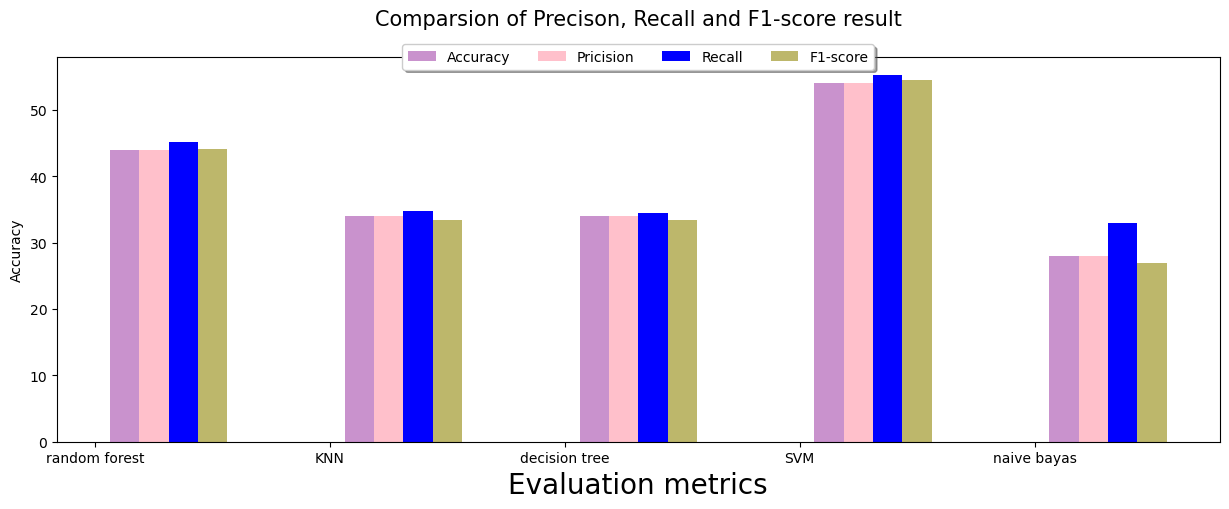

In [57]:
plt.figure(figsize=(15,5))
plt.title('Comparsion of Precison, Recall and F1-score result\n', fontsize = 15)
plt.ylabel('Accuracy' , fontsize = 10)
plt.xlabel('Evaluation metrics', fontsize = 20,)
plt.bar(X+0.125,score[0],color='#C992cd',width=0.125)
plt.bar(X+0.25,score[1],color='pink',width=0.125)
plt.bar(X+0.375,score[2],color='blue',width=0.125)
plt.bar(X+0.5,score[3],color='#BDB76B',width=0.125)
plt.xticks(X,['random forest','KNN','decision tree','SVM','naive bayas'])
plt.legend(['Accuracy','Pricision','Recall','F1-score'], loc='upper center',
           fancybox=True, shadow=True,ncol=4, bbox_to_anchor=(0.5, 1.05), )
plt.show()

# ROC Curve

In [65]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
classes =['angry', 'fear', 'happy','sad','surprise']

# SVM

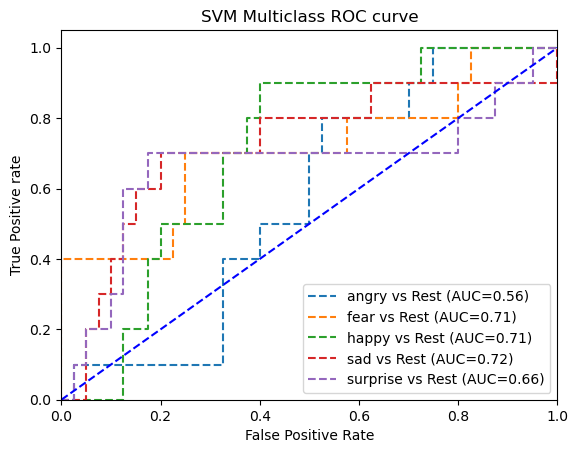

In [66]:
pred_prob_nb = model.predict_proba(x_test) 

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_nb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('SVM Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# KNN

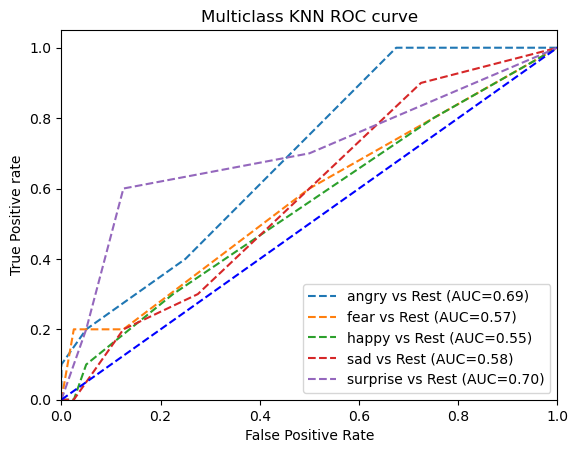

In [67]:
#      KNN
pred_prob_knn = knn.predict_proba(x_test)

#binarize the y_values 

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_knn[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Random Forest

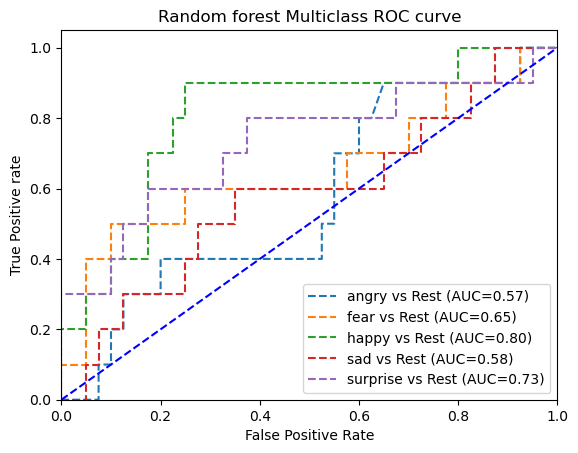

In [68]:
pred_prob_rfc = rfc.predict_proba(x_test)

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_rfc[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Random forest Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Naive Bayas

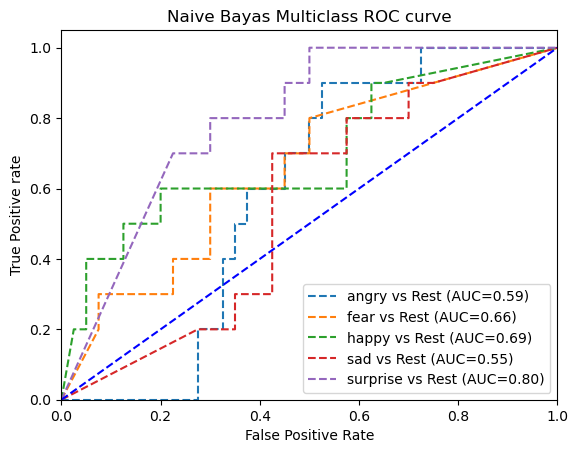

In [69]:
pred_prob_nb = nb.predict_proba(x_test) 

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_nb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Naive Bayas Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Decision Tree

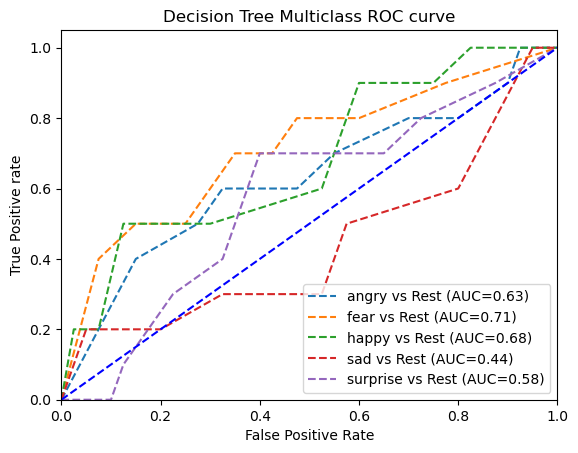

In [70]:
pred_prob_dtree = decision_tree.predict_proba(x_test) 

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = 5
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob_dtree[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Decision Tree Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()